# EDA + Spectrograms for Free Music Archive Dataset

In [18]:
!pip install -q librosa torch pydub

In [19]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
from pydub import AudioSegment

In [6]:
audio_path = "/kaggle/input/fma-free-music-archive-small-medium/fma_medium/fma_medium/000/"
audio_clips = os.listdir(audio_path)
print(f"Number of Audio Files = {len(audio_clips)}")

Number of Audio Files = 199


In [9]:
test_file = audio_clips[0]
audio_path + test_file

'/kaggle/input/fma-free-music-archive-small-medium/fma_medium/fma_medium/000/000603.mp3'

#### Convert MP3 to WAV
- Works natively with librosa much more quickly

In [ ]:
# Convert MP3 to WAV function
def convert_mp3_to_wav(mp3_path):
    audio = AudioSegment.from_mp3(mp3_path)
    wav_path = mp3_path.replace(mp3_dir, wav_dir).replace('.mp3', '.wav')
    audio.export(wav_path, format="wav")
    return wav_path

In [20]:
# Load the MP3 file
mp3_file = audio_path + test_file  # Replace with your MP3 file path
audio = AudioSegment.from_mp3(mp3_file)

# Export as WAV
wav_file = 'path_to_your_audio_file.wav'  # Replace with your desired WAV file path
audio.export(wav_file, format='wav')

print(f'Converted {mp3_file} to {wav_file}')

Converted /kaggle/input/fma-free-music-archive-small-medium/fma_medium/fma_medium/000/000603.mp3 to path_to_your_audio_file.wav


In [38]:
# Get amplitudes over time and sampling rate from librosa
y, sr = librosa.load(wav_file)

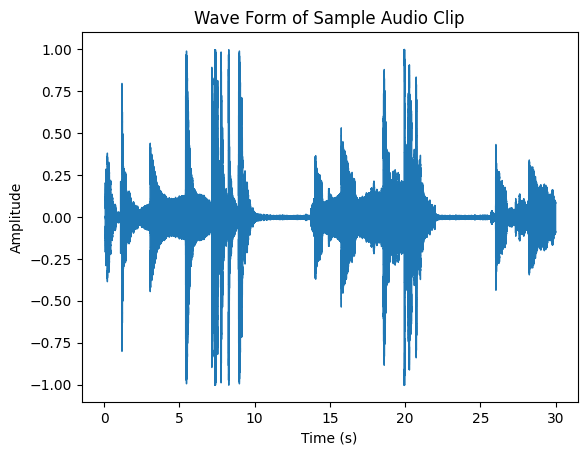

In [39]:
# Display wave form over time of audio
librosa.display.waveshow(y, sr=sr)

plt.title('Wave Form of Sample Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Play the audio
from IPython.display import Audio
Audio(y, rate=sr)

#### Mel Scale
$m = 2595 \times \log\left(1+\frac{f}{700}\right)$

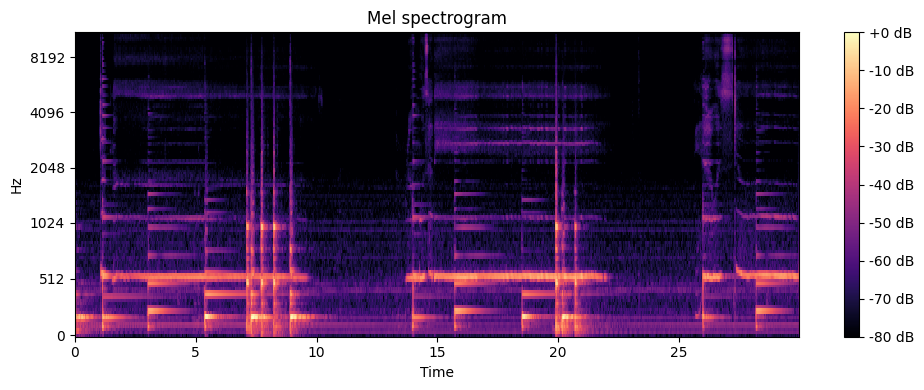

In [45]:
# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing the data
print("Mel spectrogram shape:", S.shape)
print("Mel spectrogram data (in dB):", S_dB)

In [ ]:
# Accessing the value at Mel band 10 and time frame 50
value = S_dB[10, 50]
print("Value at Mel band 10 and time frame 50 (in dB):", value)

In [ ]:
# Mean value of the Mel spectrogram in dB
mean_value = np.mean(S_dB)
print("Mean value of the Mel spectrogram (in dB):", mean_value)

#### Trying a Sample Audio File from Wikipedia

In [47]:
from pydub import AudioSegment

# Upload your file using Kaggle's upload functionality
# Ensure your file is named correctly before uploading
uploaded_file = "/kaggle/input/your_file_name.ogg"  # Replace with the path to your uploaded OGG file

# Convert OGG to WAV
audio = AudioSegment.from_file(uploaded_file)
audio.export("/kaggle/working/output.wav", format="wav")
print("Conversion successful. Saved as output.wav.")

FileUpload(value={}, accept='.ogg', description='Upload')